In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import os
from matplotlib import pyplot as plt
%matplotlib inline

### Preprocess

*useful functions*

In [11]:

def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


def scaled(img, scale): # returns new scale value
    img_shape_x, img_shape_y, channels = img.shape
    if img_shape_x > scale:
        return scale / img_shape_x
    else:
        return 1
    

def preprocess(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


*sample images/video path*

In [21]:
img1_path = "img1.jpg"
img2_path = "img2.jpg"
img3_path = "img3.jpg"

*import images*

In [100]:
img1_orig = cv2.imread(img1_path)
img2_orig = cv2.imread(img2_path)
img3_orig = cv2.imread(img3_path)

img1 = resize(img1_orig, .25 )
img2 = resize(img2_orig, .25 )
img3 = resize(img3_orig, .25 )

img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

print("image 1 shape:", img1.shape )
print("image 2 shape:", img2.shape )
print("image 3 shape:", img3.shape )

image 1 shape: (612, 816, 3)
image 2 shape: (612, 816, 3)
image 3 shape: (612, 816, 3)


*show both images*

### RGB

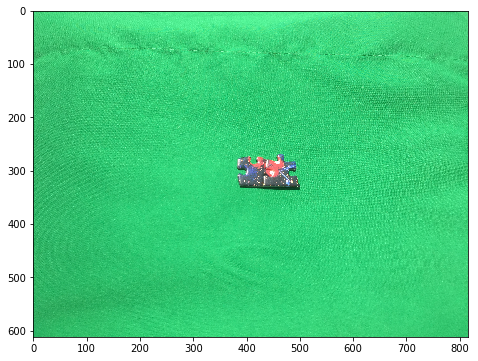

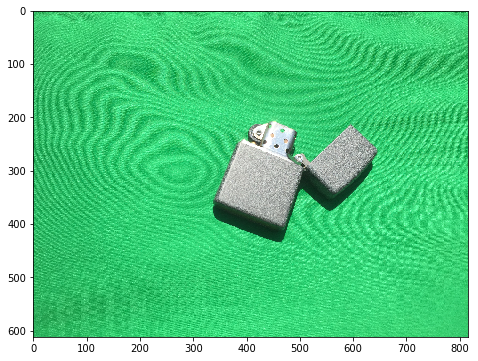

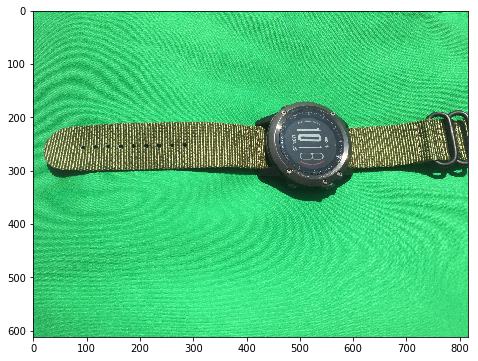

In [103]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB) )
plt.show()

### HSV

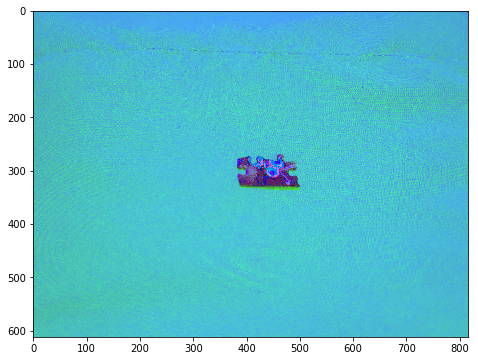

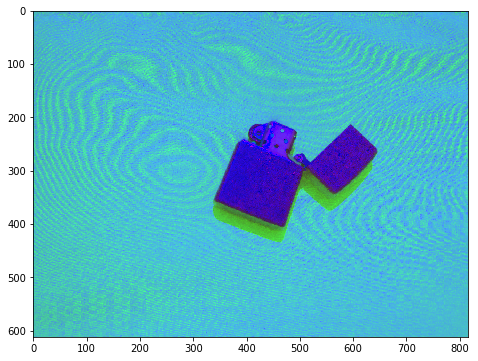

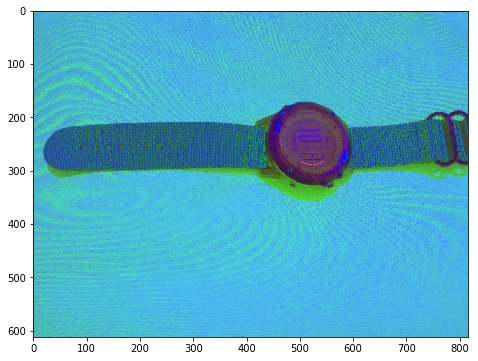

In [101]:
plt.figure(figsize=(10, 6) )
plt.imshow(img1_hsv)
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(img2_hsv)
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(img3_hsv)
plt.show()

###  *filter out blues*

##### RGB

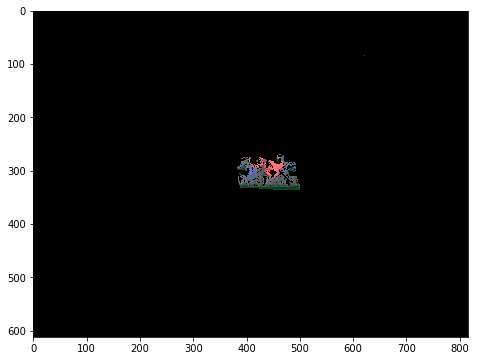

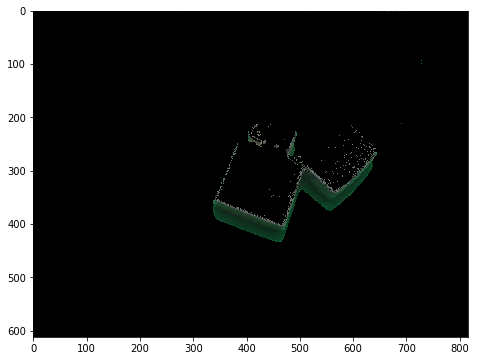

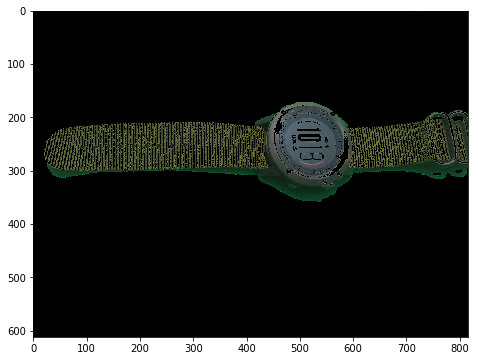

In [97]:
lower_blue = np.array([0, 0, 0])
upper_blue = np.array([255, 127, 255])

pimage1, mask1 = preprocess(img1, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(pimage1, cv2.COLOR_BGR2RGB) )
plt.show()

pimage2, mask2 = preprocess(img2, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(pimage2, cv2.COLOR_BGR2RGB) )
plt.show()

pimage3, mask3 = preprocess(img3, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(pimage3, cv2.COLOR_BGR2RGB) )
plt.show()

#### HSV

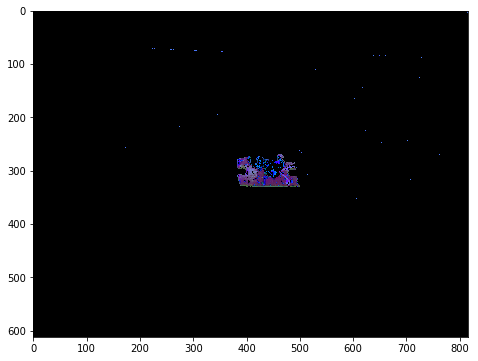

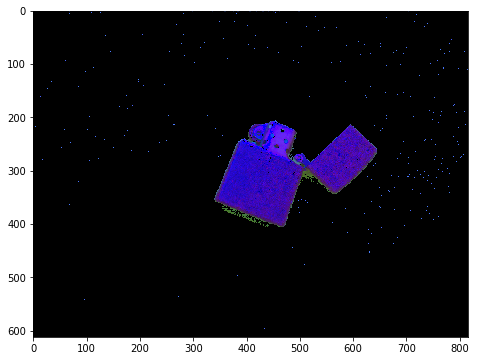

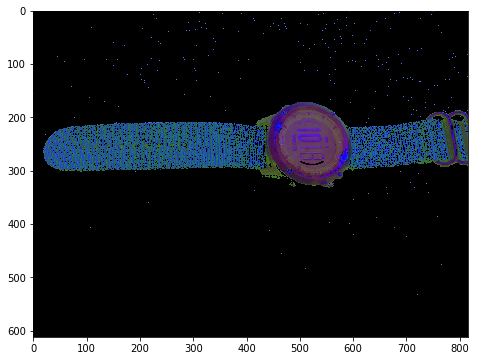

In [124]:
#lower_blue = np.array([0, 0, 0])
#upper_blue = np.array([255, 127, 255])

lower_blue = np.array([0, 0, 0])
upper_blue = np.array([127, 127, 255])

pimage1, mask1 = preprocess(img1_hsv, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(pimage1 )
plt.show()

pimage2, mask2 = preprocess(img2_hsv, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(pimage2)
plt.show()

pimage3, mask3 = preprocess(img3_hsv, [ lower_blue, upper_blue ])
plt.figure(figsize=(10, 6) )
plt.imshow(pimage3) 
plt.show()

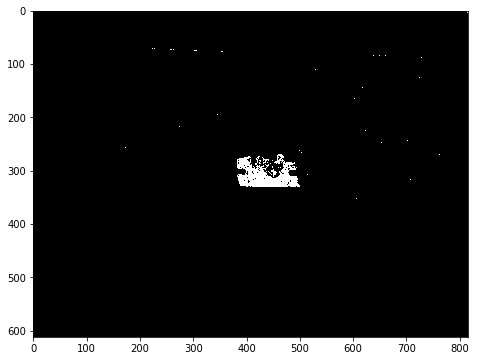

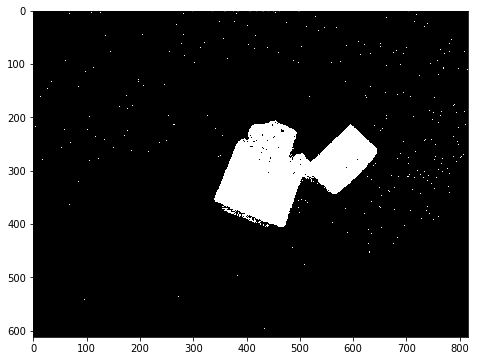

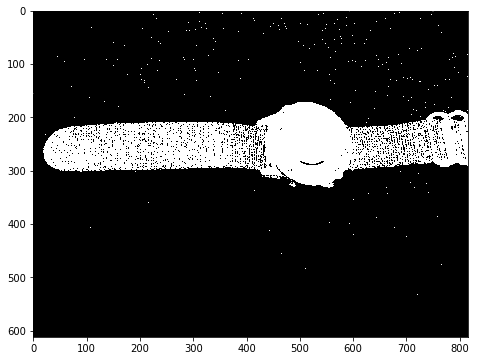

In [125]:
plt.figure(figsize=(10, 6) )
plt.imshow(mask1, cmap='gray')
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(mask2, cmap='gray')
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(mask3, cmap='gray')
plt.show()

## background foreground

In [126]:
mask1_inv = cv2.bitwise_not(mask1)
img1_fg = cv2.bitwise_and(img1, img1, mask=mask1)
img1_bg_inv = cv2.bitwise_and(img1, img1, mask=mask1_inv)

mask2_inv = cv2.bitwise_not(mask2)
img2_fg = cv2.bitwise_and(img2, img2, mask=mask2)
img2_bg_inv = cv2.bitwise_and(img2, img2, mask=mask2_inv)

mask3_inv = cv2.bitwise_not(mask3)
img3_fg = cv2.bitwise_and(img3, img3, mask=mask3)
img3_bg_inv = cv2.bitwise_and(img3, img3, mask=mask3_inv)

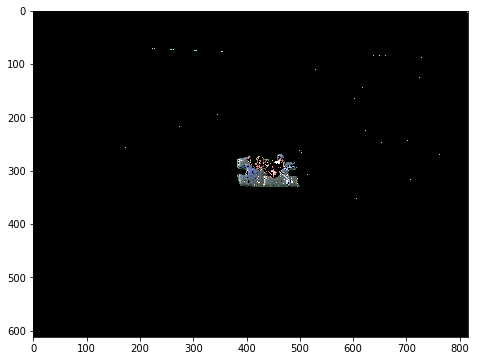

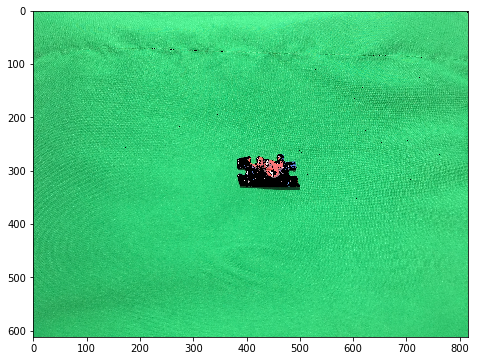

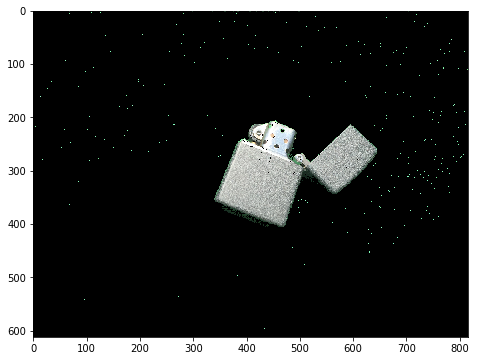

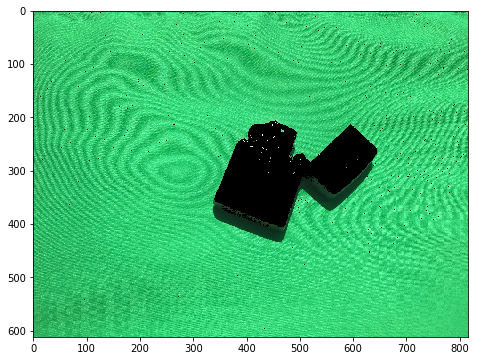

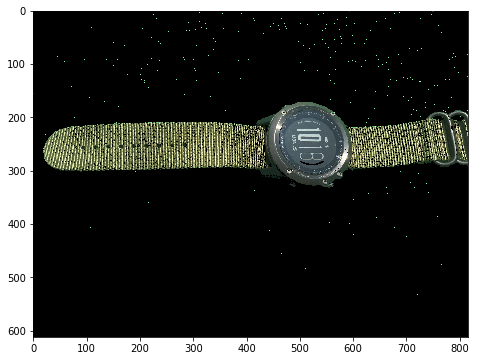

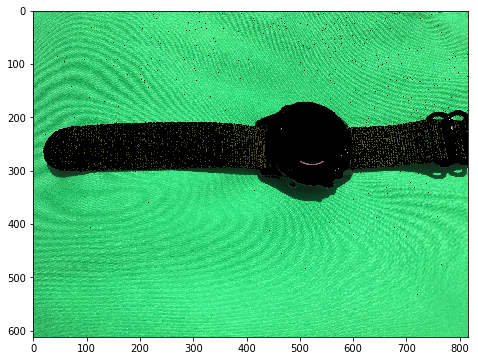

In [127]:
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1_fg, cv2.COLOR_BGR2RGB) )
plt.show()
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1_bg_inv, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB) )
plt.show()
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img2_bg_inv, cv2.COLOR_BGR2RGB) )
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img3_fg, cv2.COLOR_BGR2RGB) )
plt.show()
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img3_bg_inv, cv2.COLOR_BGR2RGB) )
plt.show()

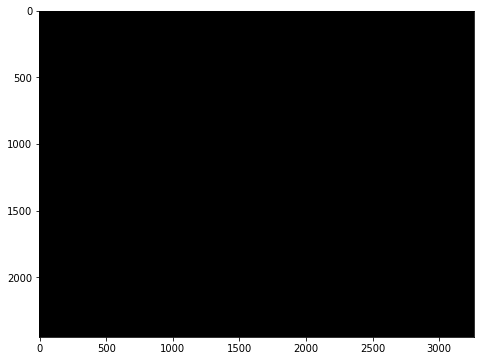

In [70]:
x3 = cv2.add(mask2, mask1_inv)
plt.figure(figsize=(10, 6) )
#plt.imshow(cv2.cvtColor(x3, cv2.COLOR_BGR2RGB) )
plt.imshow(img1_gray, cmap='gray')
plt.show()

In [68]:
print(img2_bg.shape)
print(mask3_inv.shape)

(2448, 3264, 3)
(2448, 3264)


*to grayscale*

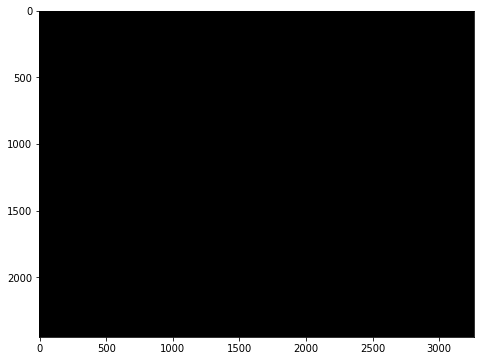

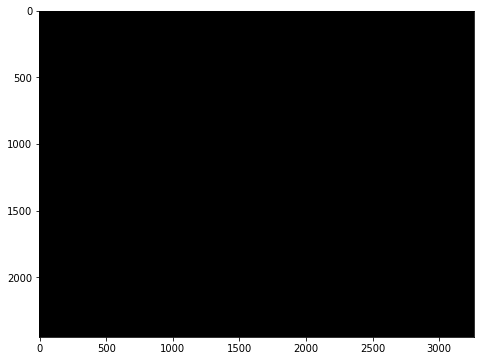

In [26]:
img1_gray = cv2.cvtColor(pimage1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6) )
plt.imshow(img1_gray, cmap='gray')
plt.show()

img2_gray = cv2.cvtColor(pimage2, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6) )
plt.imshow(img2_gray, cmap='gray')
plt.show()

### *apply threshold*

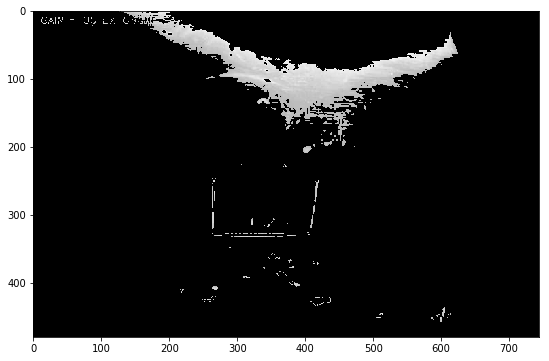

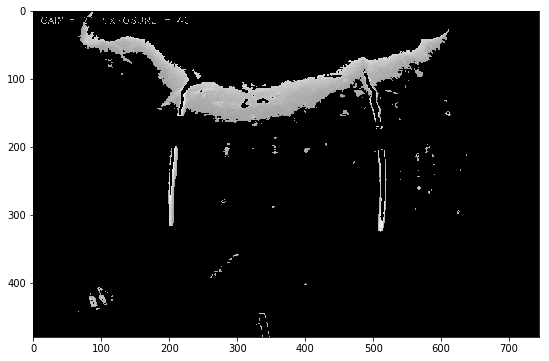

In [13]:
#ret1, img1_thresh = cv2.threshold(img1_gray, 127, 255, 0 )
ret1, img1_thresh = cv2.threshold(img1_gray, 127, 255, cv2.THRESH_TOZERO )
#ret1, img1_thresh = cv2.threshold(img1_gray, 127, 255, cv2.THRESH_BINARY )

#ret2, img2_thresh = cv2.threshold(img2_gray, 127, 255, 0 )
ret2, img2_thresh = cv2.threshold(img2_gray, 127, 255, cv2.THRESH_TOZERO )
#ret2, img2_thresh = cv2.threshold(img2_gray, 127, 255, cv2.THRESH_BINARY )

plt.figure(figsize=(10, 6) )
plt.imshow(img1_thresh, cmap='gray')
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(img2_thresh, cmap='gray')
plt.show()

### *find contours*

In [40]:
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img1_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img2_c, img2_contours, img2_heirarchy = cv2.findContours(img2_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [62]:
print(img1_heirarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 31  29  -1  -1]
  [ 32  30  -1  -1]
  [ 33  31  -1  -1]
  [ 34  32  -1  -1]
  [ 35  33  -1  -1]
  [ 36  34  -1  -1]
  [ 37  35  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 40  38  -1  -1]
  [ 41  39  -1  -1]
  [ 42  40  -1  -1]
  [ 43  41  -1  -1]
  [ 44  42  -1  -1]
  [ 45  43  -1  -1]
  [ 46  44  -1  -1]
  [ 47  45  -1  -1]
  [ 48  46  -1  -1]
  [ 49  47  -1  -1]
  [ 50  48  -1  -1]


In [41]:
x = img1_heirarchy
for i in img1_heirarchy:
    print(i)
#print(len(x))
#print(x[0])

[[  1  -1  -1  -1]
 [  2   0  -1  -1]
 [  3   1  -1  -1]
 [  4   2  -1  -1]
 [  5   3  -1  -1]
 [  6   4  -1  -1]
 [  7   5  -1  -1]
 [  8   6  -1  -1]
 [  9   7  -1  -1]
 [ 10   8  -1  -1]
 [ 11   9  -1  -1]
 [ 12  10  -1  -1]
 [ 13  11  -1  -1]
 [ 14  12  -1  -1]
 [ 15  13  -1  -1]
 [ 16  14  -1  -1]
 [ 17  15  -1  -1]
 [ 18  16  -1  -1]
 [ 19  17  -1  -1]
 [ 20  18  -1  -1]
 [ 21  19  -1  -1]
 [ 22  20  -1  -1]
 [ 23  21  -1  -1]
 [ 24  22  -1  -1]
 [ 25  23  -1  -1]
 [ 26  24  -1  -1]
 [ 27  25  -1  -1]
 [ 28  26  -1  -1]
 [ 29  27  -1  -1]
 [ 30  28  -1  -1]
 [ 31  29  -1  -1]
 [ 32  30  -1  -1]
 [ 33  31  -1  -1]
 [ 34  32  -1  -1]
 [ 35  33  -1  -1]
 [ 36  34  -1  -1]
 [ 37  35  -1  -1]
 [ 38  36  -1  -1]
 [ 39  37  -1  -1]
 [ 40  38  -1  -1]
 [ 41  39  -1  -1]
 [ 42  40  -1  -1]
 [ 43  41  -1  -1]
 [ 44  42  -1  -1]
 [ 45  43  -1  -1]
 [ 46  44  -1  -1]
 [ 47  45  -1  -1]
 [ 48  46  -1  -1]
 [ 49  47  -1  -1]
 [ 50  48  -1  -1]
 [ 51  49  -1  -1]
 [ 52  50  -1  -1]
 [ 53  51  -

In [39]:
for i in img1_contours:
    print(i)
#print(len(img1_contours))
#print(img1_contours[0])

[[[609 451]]]
[[[598 451]]

 [[598 452]]

 [[599 453]]

 [[599 455]]

 [[598 456]]

 [[598 457]]

 [[600 457]]

 [[600 456]]

 [[601 455]]

 [[600 454]]

 [[600 451]]]
[[[586 450]]

 [[585 451]]

 [[585 453]]

 [[587 453]]

 [[588 454]]

 [[589 454]]

 [[587 452]]

 [[587 451]]]
[[[510 450]]

 [[509 451]]

 [[508 451]]

 [[510 451]]]
[[[503 450]]

 [[504 450]]

 [[505 451]]

 [[506 451]]

 [[505 450]]]
[[[507 449]]]
[[[593 448]]

 [[594 449]]

 [[594 450]]

 [[594 448]]]
[[[596 446]]

 [[596 447]]

 [[598 447]]

 [[598 446]]]
[[[613 445]]

 [[613 446]]]
[[[611 445]]

 [[610 446]]

 [[610 447]]

 [[611 447]]]
[[[608 445]]]
[[[510 445]]

 [[509 446]]

 [[509 447]]

 [[511 447]]

 [[511 446]]

 [[512 445]]

 [[513 446]]

 [[514 446]]

 [[515 447]]

 [[514 446]]

 [[514 445]]]
[[[610 443]]]
[[[608 439]]

 [[608 442]]]
[[[604 436]]

 [[603 437]]

 [[603 438]]

 [[602 439]]

 [[603 440]]

 [[603 442]]

 [[602 443]]

 [[602 446]]

 [[601 447]]

 [[604 450]]

 [[604 445]]

 [[605 444]]

 [[605

*filter contours*

In [23]:
# not used

print(len(img1_contours) )
print(len(img2_contours) )

def contours_filter(img_contours):
    new_contour_list = []
    for cont in img_contours:
        if len(cont) > 20 and len(cont) < 200:
            new_contour_list.append(cont)
    return np.array(new_contour_list)

filt_1 = contours_filter(img1_contours)
filt_2 = contours_filter(img2_contours)

print(len(filt_1))
print(len(filt_2))


312
238
7
14


[ 1 -1 -1 -1]


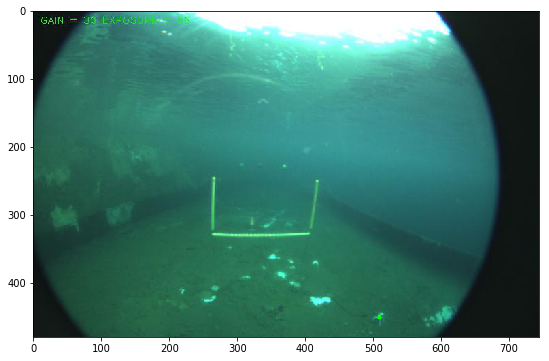

In [71]:
threshold_color = [0, 255, 0] # green

img1_copy = img1.copy()

cont = img1_heirarchy[0][0]
print(cont)
img1_contours[0]

#cv2.drawContours(img1_copy, img1_contours, img1_heirarchy[0][6][0], threshold_color, 3)
cv2.drawContours(img1_copy, img1_contours, 3, threshold_color, 3)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1_copy, cv2.COLOR_BGR2RGB) )
plt.show()

*draw contours*

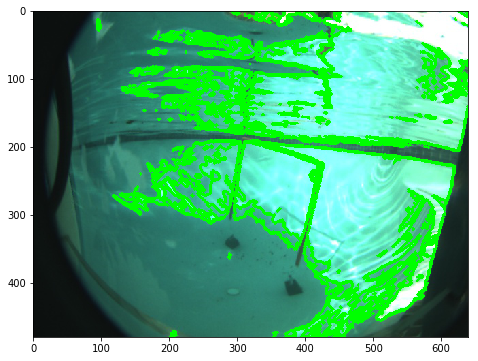

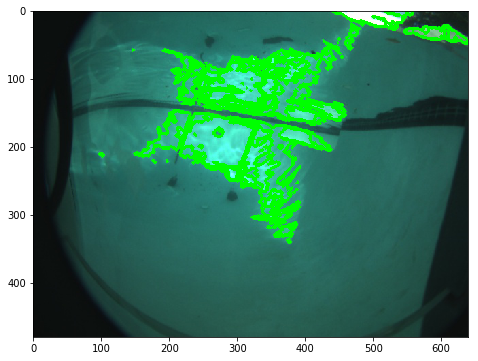

In [13]:
threshold_color = [0, 255, 0] # green

img1_copy = img1.copy()

cv2.drawContours(img1_copy, img1_contours, -1, threshold_color, 3)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img1_copy, cv2.COLOR_BGR2RGB) )
plt.show()


img2_copy = img2.copy()

cv2.drawContours(img2_copy, img2_contours, -1, threshold_color, 3)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img2_copy, cv2.COLOR_BGR2RGB) )
plt.show()

*useful bounding box functions*

In [14]:
def create_all_boxes(img_contours_list): # takes in a list of contour coordinates and returns an list of boxes around contours
    box_list = []
    for contour in img_contours_list:
        cv2.boundingRect(contour)
        box_list.append(contour)
    return box_list

def filter_boxes(img_rectangle_list, filter_size=0):
    filtered_boxes = []
    for rectangle in img_rectangle_list:
        if(rectangle[2] * rectangle[3] > filter_size):
            filtered_boxes.append(rectangle)
    return filtered_boxes

def draw_rectangles(img, img_rectangle_list, x_offset=0, y_offset=0):
    for x, y, w, h in img_rectangle_list:
        cv2.rectangle(
            img,
            (x - x_offset, y - y_offset),
            ( (x + x_offset) + w, (y + y_offset) + h),
            (0, 255, 0),
            2
        )

### *calculate/find gate/bars (the more the better)*

In [15]:
cpy1 = img1.copy()
rgb1 = rgb1 = cv2.cvtColor(cpy1, cv2.COLOR_BGR2RGB)

cpy2 = img2.copy()
rgb2 = rgb2 = cv2.cvtColor(cpy2, cv2.COLOR_BGR2RGB)

In [16]:
box_filter_size = 400

In [18]:
''' ------------- img-1 ------------- '''
img1_all_boxes = [cv2.boundingRect(c) for c in img1_contours]
#img1_all_boxes = create_all_boxes(img1_contours) # doesn't work... idk why
#print("Image 1 number of boxes:", len(img1_all_boxes) )

img1_filter_boxes = filter_boxes(img1_all_boxes, box_filter_size)
#print("Image 1 number of filtered boxes over size", box_filter_size, ":", len(img1_filter_boxes) )

print("(x-coord, y-coord, width, height) = ", img1_filter_boxes[0])


''' ------------- img-2 ------------- '''
img2_all_boxes = [cv2.boundingRect(c) for c in img2_contours]
#img2_all_boxes = create_all_boxes(img2_contours) # doesn't work... idk why
#print("Image 2 number of boxes:", len(img2_all_boxes) )

img2_filter_boxes = filter_boxes(img2_all_boxes, box_filter_size)
#print("Image 2 number of filtered boxes over size", box_filter_size, ":", len(img2_filter_boxes) )


(x-coord, y-coord, width, height) =  (427, 445, 34, 35)


*draw boxes on images*

In [20]:
## COMMENTED OUT FOR WORK IN PT. 4 - END BELOW

'''
draw_rectangles(rgb1, [img1_filter_boxes[1]], 5, 5)
draw_rectangles(rgb2, img2_filter_boxes, 5, 5)

plt.figure(figsize=(10, 6) )
plt.imshow(rgb1)
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(rgb2)
plt.show()
'''
print()

In [ ]:
## Notes for 11/17/2017 meeting
# houghtransform
# Canny
# aspect ratio - divisible by eight
# test limit of svm - start small amount of images


### 4. Feature Extraction

*useful directory extraction/info methods*

In [17]:
# returns a list of file names in a directory: cwd is default
def get_dir_list(imgs_path):
    dir_list = []
    with os.scandir(imgs_path) as it: # from python3 docs
        for entry in it:
            if not entry.name.startswith(".") and entry.is_file:
                dir_list.append(imgs_path + entry.name)
    return dir_list

def get_img_data(imgs_path):
    img_list = []
    for img in imgs_path:
        img_list.append(cv2.imread(img) )
    return img_list

def get_features_with_label(image_data, hog, dimensions, label):
    data = []
    for img in image_data:
        image = cv2.resize(img, dimensions) # resize to proportion might help
        feats = hog.compute(image[:, :, 2])
        data.append((feats, label) )
    return data

In [18]:
def remove_blue(image):
    image[:,:,0] = 0
    return image

*get files from directory*

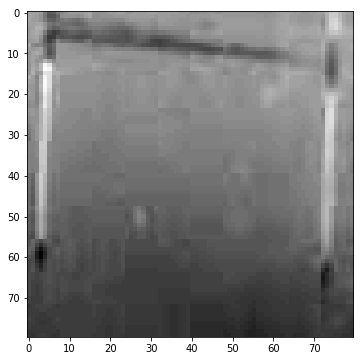

Shape:  (80, 80, 3)


In [19]:
pos_image_path = "positive/"
neg_image_path = "negative/"

pos_img_list = get_dir_list(pos_image_path)
neg_img_list = get_dir_list(neg_image_path)

positive_images = get_img_data(pos_img_list)
negative_images = get_img_data(neg_img_list)

lower = [100, 0, 0]
upper = [255, 255, 255]

img = positive_images[10].copy()

#img_rem = remove_blue(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#ret, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO )
#img, musk = preprocess(b, [lower, upper])

#plt.imshow(cv2.cvtColor(positive_images[0], cv2.COLOR_BGR2RGB) )
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#c = clahe.apply(img_gray)

plt.figure(figsize=(10, 6) )
plt.imshow(img_gray, cmap='gray')
plt.show()

print("Shape: ", positive_images[0].shape)

Define HOG params/descriptor

In [20]:
min_dim = 80
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
bins = 9

dimensions = (min_dim, min_dim)

hog = cv2.HOGDescriptor(dimensions, block_size, block_stride, cell_size, bins)

Extract features and assign labels

In [21]:
p_images = get_features_with_label(positive_images, hog, dimensions, 1) # 1 is positive images
n_images = get_features_with_label(negative_images, hog, dimensions, 0) # 0 is negative images

In [22]:
print("Number of POSITIVE image features:", len(p_images) )
print("Number of NEGATIVE images features:", len(n_images) )

Number of POSITIVE image features: 52
Number of NEGATIVE images features: 136


## 5. Learn

*combine positive and negative features and shuffle*

In [23]:
imgs_df = p_images + n_images
np.random.shuffle(imgs_df) # shuffle
print("Total # of features:", len(imgs_df) )

Total # of features: 188


*split date in to testing/training sets*

In [24]:
feat, labels = map(list, zip(*imgs_df) )
feat_flat = [x.flatten() for x in feat]

X_df = pd.DataFrame(feat_flat) # convert to df
y_df = pd.Series(labels) # convert to series

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=2)

print("Feature TRAINING data", X_train.shape)
print("Feature TESTING data ", X_test.shape)
print("Label TRAINING data  ", y_train.shape)
print("Label TESTING data   ", y_test.shape)

Feature TRAINING data (131, 2916)
Feature TESTING data  (57, 2916)
Label TRAINING data   (131,)
Label TESTING data    (57,)


MLP - activation="logistic" - sigmoid;
"adam" optimized gradient descent
alpha=how_sparse_
intercepts=weigths of bias

*train svm*

In [25]:
svm_l = SVC(C = 1.0, probability=True, random_state=2)
svm_l.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)

In [26]:
print(svm_l.score(X_train, y_train) )

0.7022900763358778


In [27]:
print("Test Accuracy:", svm_l.score(X_test, y_test) )
y_pred = svm_l.predict(X_test)
print("\nClassification report")
print(classification_report(y_test, y_pred) )

Test Accuracy: 0.7719298245614035

Classification report
             precision    recall  f1-score   support

          0       0.77      1.00      0.87        44
          1       0.00      0.00      0.00        13

avg / total       0.60      0.77      0.67        57



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
wrong = (y_pred != y_test).sum()
print("Misclassified samples:", wrong)

Misclassified samples: 13


In [29]:
confusion_matrix(y_pred, y_test)

# true []
# false []

array([[44, 13],
       [ 0,  0]])

### 6. Classification

*check features*

In [30]:
def get_positive_roi(img, roi_list, x_offset=0, y_offset=0):
    positive_roi = []
    for x, y, w, h in roi_list:
        roi = img[y:y + h, x:x + w, :3]
        roi_resized = cv2.resize(roi, dimensions) # dimensions defined as (80, 80) above
        features = hog.compute(roi_resized)
        proba = svm_l.predict_proba(features.reshape(1, -1) )[0] # will produce meaningless results on very small datasets per docs
        if proba[1] > .1:
            positive_roi.append((x, y, w, h) )
    return positive_roi

In [31]:
im1_cont_f = contours_filter(img1_contours)
im2_cont_f = contours_filter(img2_contours)

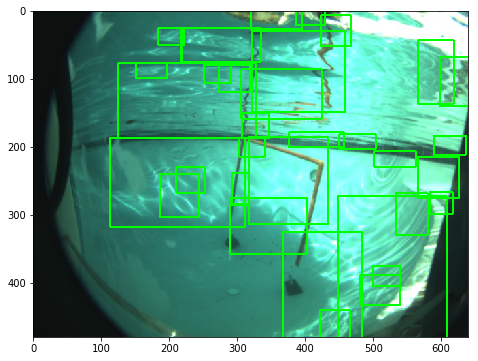

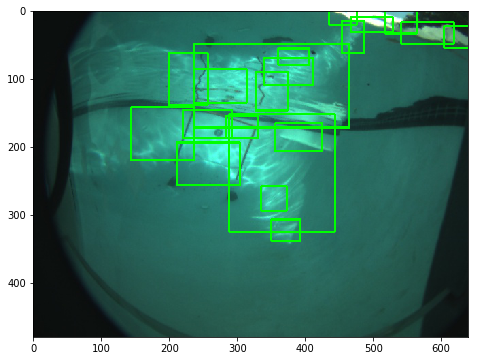

In [32]:
# Split all this below in to different cells for testing


img1_all_boxes = [cv2.boundingRect(c) for c in img1_contours]
#img1_all_boxes = [cv2.boundingRect(c) for c in im1_cont_f]
img1_filter_boxes = filter_boxes(img1_all_boxes, box_filter_size)

roi_filtered_1 = get_positive_roi(rgb1, img1_filter_boxes)
draw_rectangles(rgb1, roi_filtered_1, 5, 5)

plt.figure(figsize=(10, 6) )
plt.imshow(rgb1)
plt.show()


img2_all_boxes = [cv2.boundingRect(c) for c in img2_contours]
#img2_all_boxes = [cv2.boundingRect(c) for c in im2_cont_f]
img2_filter_boxes = filter_boxes(img2_all_boxes, box_filter_size)

roi_filtered_2 = get_positive_roi(rgb2, img2_filter_boxes)
draw_rectangles(rgb2, roi_filtered_2, 5, 5)

plt.figure(figsize=(10, 6) )
plt.imshow(rgb2)
plt.show()

print()

# END

### TESTING

## Split method above into different cells for testing

*get boxes using preprocess*

In [77]:
# box_filter_size = 400 ABOVE
img1_all_boxes = [cv2.boundingRect(c) for c in img1_contours]
img1_filter_boxes = filter_boxes(img1_all_boxes, box_filter_size)

img2_all_boxes = [cv2.boundingRect(c) for c in img2_contours]
img2_filter_boxes = filter_boxes(img2_all_boxes, box_filter_size)


*info about PREPROCESS boxes*

In [78]:
print("PREPROCESS FILTERING:\n")
print("img1 ALL BOXES length:", len(img1_all_boxes) )
print("img1 FILTER BOXES length:", len(img1_filter_boxes) )
print()
print("img2 ALL BOXES length:", len(img2_all_boxes) )
print("img2 FILTER BOXES length:", len(img2_filter_boxes) )

PREPROCESS FILTERING:

img1 ALL BOXES length: 406
img1 FILTER BOXES length: 8

img2 ALL BOXES length: 41
img2 FILTER BOXES length: 2


*filter ROI using SVM*

In [79]:
roi_all_1 = get_positive_roi(rgb1, img1_all_boxes)
roi_filtered_1 = get_positive_roi(rgb1, img1_filter_boxes)

roi_all_2 = get_positive_roi(rgb2, img2_all_boxes)
roi_filtered_2 = get_positive_roi(rgb2, img2_filter_boxes)


*info about ROI boxes*

In [80]:
print("SVM FILTERING:\n")
print("img1 ALL BOXES length:", len(roi_all_1) )
print("img1 FILTER BOXES length:", len(roi_filtered_1) )
print()
print("img2 ALL BOXES length:", len(roi_all_2) )
print("img2 FILTER BOXES length:", len(roi_filtered_2) )

SVM FILTERING:

img1 ALL BOXES length: 270
img1 FILTER BOXES length: 4

img2 ALL BOXES length: 24
img2 FILTER BOXES length: 2


*comparison between PREPROCESS and ROI SVM boxes*

In [81]:
print("IMAGE 1 - Number of filtered boxes classified by SVM:  ", len(img1_filter_boxes) - len(roi_filtered_1) )
print("IMAGE 1 - On all boxes (no preprocess):                ", len(img1_all_boxes) - len(roi_all_1) )

print()

print("IMAGE 2 - Number of filtered boxes classified by SVM:  ", len(img2_filter_boxes) - len(roi_filtered_2) )
print("IMAGE 2 - On all boxes (no preprocess):                ", len(img2_all_boxes) - len(roi_all_2) )

IMAGE 1 - Number of filtered boxes classified by SVM:   4
IMAGE 1 - On all boxes (no preprocess):                 136

IMAGE 2 - Number of filtered boxes classified by SVM:   0
IMAGE 2 - On all boxes (no preprocess):                 17


In [82]:
def get_positive_roi(img, roi_list, x_offset=0, y_offset=0):
    print("FILTERED BOXES LIST LENGTH", len(roi_list) )
    positive_roi = []
    for x, y, w, h in roi_list:
        roi = img[y:y + h, x:x + w, :3]
        roi_resized = cv2.resize(roi, dimensions) # dimensions defined as (80, 80) above
        features = hog.compute(roi_resized)
        proba = svm.predict_proba(features.reshape(1, -1) )[0]
        print("\nproba:", svm.predict_proba(features.reshape(1, -1) ))
        print("proba[0]:", proba[0])
        print("proba[1]:", proba[1])
        print()
        if proba[1] > .1:
            positive_roi.append((x, y, w, h) )
            print("HIT!!!!!", "(", x, y, w, h, ")")
    print("\nPOSITIVE ROI LENGTH:", len(positive_roi) )
    return positive_roi

#AA_roi_filtered_2 = get_positive_roi(rgb2, img2_filter_boxes)

*draw rectangles on img*

In [83]:
draw_rectangles(rgb1, roi_filtered_1, 5, 5)
draw_rectangles(rgb2, roi_filtered_2, 5, 5)

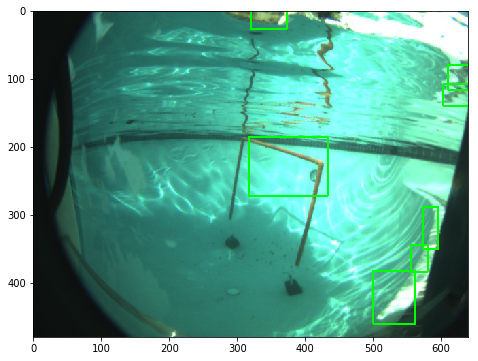

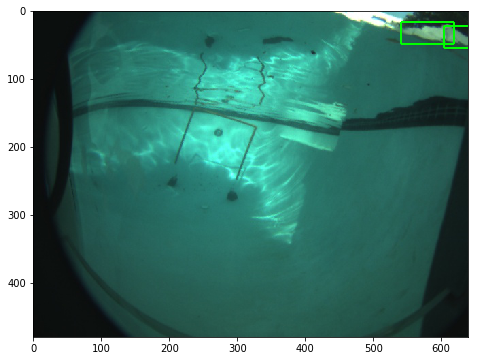

In [84]:
plt.figure(figsize=(10, 6) )
plt.imshow(rgb1)
plt.show()

plt.figure(figsize=(10, 6) )
plt.imshow(rgb2)
plt.show()